In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

In [2]:
path1 = Path("Data/batch1.pkl")
batch1 = pickle.load(open(path1, 'rb'))

#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

In [4]:
batch1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

# 1 Cell

In [5]:
# this is all data for cell 0 from batch 1
# The cleaned data set from all 3 batches contains 124 cells
batch1["b1c0"].keys() 

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

## Dict structure
1. Cell<br>
    1.1 Cycle Life<br>
    1.2 Charge Policy<br>
    1.3 Summary (per charging cycle)
        1.3.1 Internal Resistance (Ω)
        1.3.2 Total Quantity of Charge (Ah)
        1.3.3 Total Quantity of Discharge (Ah)
        1.3.4 Temp Avg (C°)
        1.3.5 Temp min (C°)
        1.3.6 Temp Max (C°)
        1.3.7 Charge time (minutes)
        1.3.8 Cycle no. (Int)
    1.4 Cycle (all data points per cycle)
        1.4.1 Current (C-Rate)
        1.4.2 Quantity of Charge (Ah)
        1.4.3 Quantity of Discharge (Ah)
        1.4.4 Qdlin (?)
        1.4.5 Temperature (C°)
        1.4.6 Tdlin (?)
        1.4.7 Voltage (V)
        1.4.8 dQdV (?)
        1.4.9 Time elapsed (minutes)    

# 1.1 Cycle Life

In [22]:
for cell in batch1.keys():
    print(cell, ": ", batch1[cell]["cycle_life"]) # total number of cycles measured

b1c0 :  [[1190.]]
b1c1 :  [[1179.]]
b1c2 :  [[1177.]]
b1c3 :  [[1226.]]
b1c4 :  [[1227.]]
b1c5 :  [[1074.]]
b1c6 :  [[636.]]
b1c7 :  [[870.]]
b1c9 :  [[1054.]]
b1c11 :  [[788.]]
b1c14 :  [[880.]]
b1c15 :  [[719.]]
b1c16 :  [[862.]]
b1c17 :  [[857.]]
b1c18 :  [[691.]]
b1c19 :  [[788.]]
b1c20 :  [[534.]]
b1c21 :  [[559.]]
b1c23 :  [[1014.]]
b1c24 :  [[1017.]]
b1c25 :  [[854.]]
b1c26 :  [[870.]]
b1c27 :  [[842.]]
b1c28 :  [[860.]]
b1c29 :  [[917.]]
b1c30 :  [[709.]]
b1c31 :  [[876.]]
b1c32 :  [[731.]]
b1c33 :  [[757.]]
b1c34 :  [[742.]]
b1c35 :  [[703.]]
b1c36 :  [[704.]]
b1c37 :  [[648.]]
b1c38 :  [[617.]]
b1c39 :  [[625.]]
b1c40 :  [[966.]]
b1c41 :  [[1051.]]
b1c42 :  [[702.]]
b1c43 :  [[651.]]
b1c44 :  [[616.]]
b1c45 :  [[599.]]


# 1.2 Charge Policy

A C-rate is a measure of the rate at which a battery is discharged relative to its maximum capacity.
A 1C rate means that the discharge current will discharge the entire battery in 1 hour.
For a battery with a capacity of 1 Amp-hrs, this equates to a discharge current of 1 Amps.
A 5C rate for this battery would be 5 Amps, and a C/2 rate would be 0.5 Amps.

Cells are charged from 0% to 80% state-of-charge (SOC) with one of 72 different one-step and two-step charging
policies. One step corresponds to one constant C-rate.

An internal resistance measurement was obtained during charging at 80% SOC by averaging 10 pulses of ±3.6 C with
a pulse width of 30 or 33 ms.

All cells then charged from 80% to 100% SOC with a uniform 1 C CC-CV charging step to 3.6 V and a current
cutoff of C/50.
All cells were subsequently discharged with a CC-CV discharge at 4 C to 2.0 V with a current cutoff of C/50.

The used cell model has a nominal capacity of 1.1 Ah so 3.6C equates to 3.96 Amps (for example).

Since the charging after 80% SOC is continued with 1C CC-CV the formatting of the charging policy is
interpreted as follows (two examples):

5.4C(40%)-3.6C <br>
*C-rate of first step* (SOC at the end of the first step) *C-rate of second step*

3.6C(80%)-3.6C <br>
*C-rate of first step* (SOC at the end of the first step) *also C-rate of first step to keep formatting consistent*

In [26]:
for cell in batch1.keys():
    print(cell, ": ", batch1[cell]["charge_policy"])

b1c0 :  3.6C(80%)-3.6C
b1c1 :  3.6C(80%)-3.6C
b1c2 :  3.6C(80%)-3.6C
b1c3 :  4C(80%)-4C
b1c4 :  4C(80%)-4C
b1c5 :  4.4C(80%)-4.4C
b1c6 :  4.8C(80%)-4.8C
b1c7 :  4.8C(80%)-4.8C
b1c9 :  5.4C(40%)-3.6C
b1c11 :  5.4C(50%)-3C
b1c14 :  5.4C(60%)-3C
b1c15 :  5.4C(60%)-3C
b1c16 :  5.4C(60%)-3.6C
b1c17 :  5.4C(60%)-3.6C
b1c18 :  5.4C(70%)-3C
b1c19 :  5.4C(70%)-3C
b1c20 :  5.4C(80%)-5.4C
b1c21 :  5.4C(80%)-5.4C
b1c23 :  6C(30%)-3.6C
b1c24 :  6C(40%)-3C
b1c25 :  6C(40%)-3C
b1c26 :  6C(40%)-3.6C
b1c27 :  6C(40%)-3.6C
b1c28 :  6C(50%)-3C
b1c29 :  6C(50%)-3C
b1c30 :  6C(50%)-3.6C
b1c31 :  6C(50%)-3.6C
b1c32 :  6C(60%)-3C
b1c33 :  6C(60%)-3C
b1c34 :  7C(30%)-3.6C
b1c35 :  7C(30%)-3.6C
b1c36 :  7C(40%)-3C
b1c37 :  7C(40%)-3C
b1c38 :  7C(40%)-3.6C
b1c39 :  7C(40%)-3.6C
b1c40 :  8C(15%)-3.6C
b1c41 :  8C(15%)-3.6C
b1c42 :  8C(25%)-3.6C
b1c43 :  8C(25%)-3.6C
b1c44 :  8C(35%)-3.6C
b1c45 :  8C(35%)-3.6C


# 1.3 Summary (for each cell over every cycle)

In [30]:
batch1["b1c0"]["summary"].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

### 1.3.1 Internal Resistance

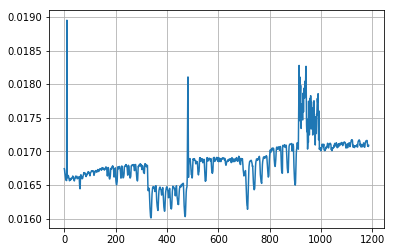

In [88]:
# Measured in Ohm
cleaned_I = [i for i in batch1["b1c0"]["summary"]["IR"] if i > 0.01]
plt.grid()
plt.plot(cleaned_I)
plt.show()

### 1.3.2/3 Quantity of charge/discharge

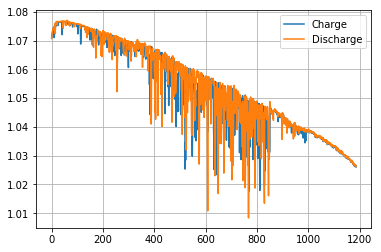

In [118]:
# Q is used to denote a quantity of electricity or charge. Measured in Ah.
cleaned_QC = [i for i in batch1["b1c0"]["summary"]["QC"] if 1.5 > i > 0.5]
cleaned_QD = [i for i in batch1["b1c0"]["summary"]["QD"] if 1.5 > i > 0.5]
plt.plot(cleaned_QC, label="Charge")
plt.plot(cleaned_QD, label="Discharge")
plt.legend()
plt.grid()
plt.show()

### 1.3.4/5/6 Temperature mean/min/max

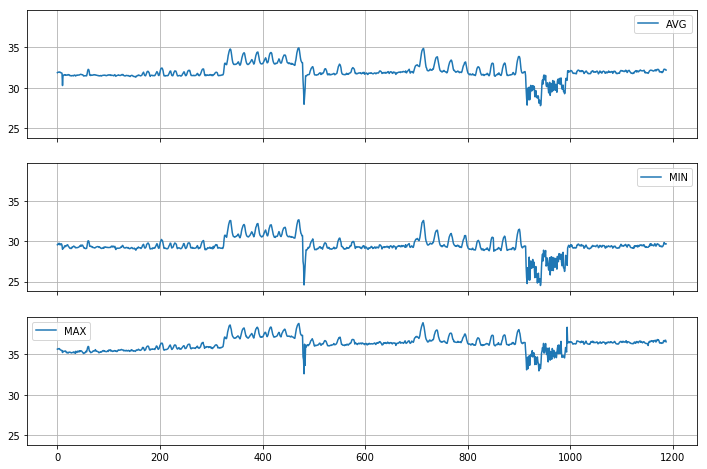

In [47]:
# measured in Celcius?
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12,8))
ax1.plot(batch1["b1c0"]["summary"]["Tavg"][1:], label="AVG")
ax2.plot(batch1["b1c0"]["summary"]["Tmin"][1:], label="MIN")
ax3.plot(batch1["b1c0"]["summary"]["Tmax"][1:], label="MAX")
ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()
plt.show()

### 1.3.7 Charge time

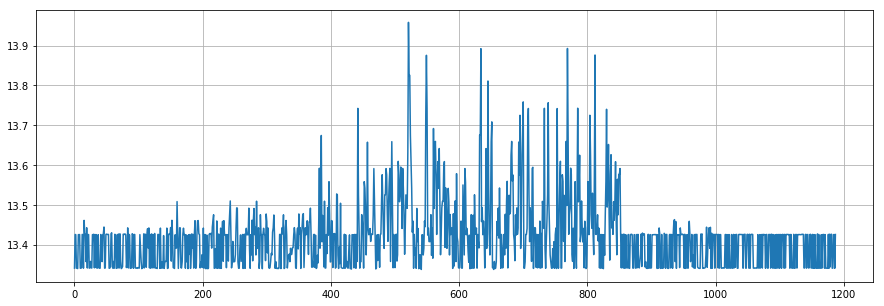

In [51]:
# Measured in minutes.
plt.figure(figsize=(15,5))
cleaned_chargetime = [i for i in batch1["b1c0"]["summary"]["chargetime"] if i > 5]
plt.plot(cleaned_chargetime)
plt.grid()
plt.show()

### 1.3.8 Cycle number

In [93]:
# Number/index of charging cycle starting from 1!
list(batch1["b1c0"]["summary"]["cycle"])[0:10] 

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [94]:
# Note: The lenght of cycle indeces doesn't match up with cycle life and is always one less.
for cell in batch1.keys():
    print(cell, ": ", batch1[cell]["cycle_life"], "len(cycles): ", len(batch1[cell]["summary"]["cycle"]))

b1c0 :  [[1190.]] len(cycles):  1189
b1c1 :  [[1179.]] len(cycles):  1178
b1c2 :  [[1177.]] len(cycles):  1176
b1c3 :  [[1226.]] len(cycles):  1225
b1c4 :  [[1227.]] len(cycles):  1226
b1c5 :  [[1074.]] len(cycles):  1073
b1c6 :  [[636.]] len(cycles):  635
b1c7 :  [[870.]] len(cycles):  869
b1c9 :  [[1054.]] len(cycles):  1053
b1c11 :  [[788.]] len(cycles):  787
b1c14 :  [[880.]] len(cycles):  879
b1c15 :  [[719.]] len(cycles):  718
b1c16 :  [[862.]] len(cycles):  861
b1c17 :  [[857.]] len(cycles):  856
b1c18 :  [[691.]] len(cycles):  690
b1c19 :  [[788.]] len(cycles):  787
b1c20 :  [[534.]] len(cycles):  533
b1c21 :  [[559.]] len(cycles):  558
b1c23 :  [[1014.]] len(cycles):  1013
b1c24 :  [[1017.]] len(cycles):  1016
b1c25 :  [[854.]] len(cycles):  853
b1c26 :  [[870.]] len(cycles):  869
b1c27 :  [[842.]] len(cycles):  841
b1c28 :  [[860.]] len(cycles):  859
b1c29 :  [[917.]] len(cycles):  916
b1c30 :  [[709.]] len(cycles):  708
b1c31 :  [[876.]] len(cycles):  875
b1c32 :  [[731.]] l

# 1.4 Cycles

In [97]:
print(list(batch1["b1c0"]["cycles"].keys())[:10])  # Cycle indeces starting from 0!

# Lenght equals that of batch1[cell]["summary"]["cycle"]
print("length: ", len(list(batch1["b1c0"]["cycles"].keys())))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
length:  1189


### Get all data from one exemplary charging cycle, e.g. #1054

In [99]:
for key, val in batch1["b1c0"]["cycles"]["1054"].items():
    print("%s\t%s" % (key, len(val)))

I	1051
Qc	1051
Qd	1051
Qdlin	1000
T	1051
Tdlin	1000
V	1051
dQdV	1000
t	1051


### 1.4.1 I (current in C)

b1c0 charging policy: 3.6C(80%)-3.6C
1. The cell is fast charged with 3.6C until ~80%.
2. 1 minute and 1 second rest (according to batch one Notes)
3. fully charged with 1C CC-CV (Constant voltage cutoff current of C/50)
4. Discharging happens with constant 4C.
5. Current levels of after finishing discharging

For explanation of charging policy see 1.2.

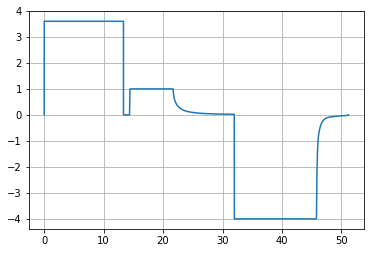

In [109]:
cycle = batch1["b1c0"]["cycles"]["1054"]
plt.plot(cycle["t"], cycle["I"])  # t in minutes, I in Amps
plt.grid()
plt.show()

### 1.4.2/3 Qc (charge) and Qd (discharge) in Ah

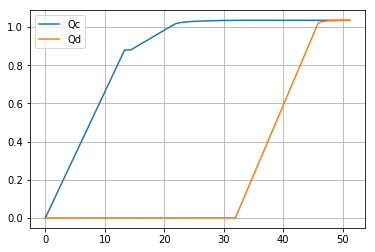

In [114]:
cycle = batch1["b1c0"]["cycles"]["1054"]

# Note: timescale t is "global" for both Qc and Qd --> Discharge starts at around 32 minutes.
plt.plot(cycle["t"], cycle["Qc"], label="Qc")
plt.plot(cycle["t"], cycle["Qd"], label="Qd")
plt.grid()
plt.legend()
plt.show()

In [120]:
# Last Cycle Measurements are recorded in Summary for Cell Cycle
cycle = batch1["b1c0"]["cycles"]["1054"]

print('Qd last cycle', cycle["Qd"][-1])
print('QD summary', batch1["b1c0"]["summary"]["QD"][1054])
print('Qc last cycle', cycle["Qc"][-1])
print('QC summary', batch1["b1c0"]["summary"]["QC"][1054])

Qd last cycle 1.035984
QD summary 1.035984
Qc last cycle 1.0357687
QC summary 1.0357687


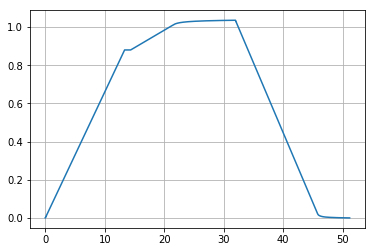

In [123]:
# Overlay of graphs Qc and Qd
cycle = batch1["b1c0"]["cycles"]["1054"]

plt.plot(cycle["t"], cycle["Qc"] - cycle["Qd"])
plt.grid()
plt.show()

### 1.4.4 Qdlin

Is Qdlin a smoothed out version of Qd.

A spline was fitted for that purpose, so Qdlin is resampled with 1000 sample points. <br>

Voltage is plotted over Qdlin and Qd.
In the final paper only the voltage range between 3.5V and 2.0V was considered.

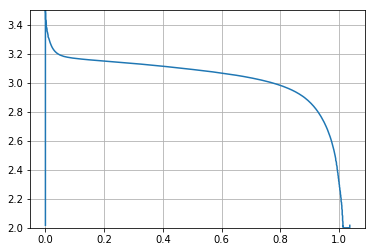

In [153]:
cycle = batch1["b1c0"]["cycles"]["1054"]

plt.plot(cycle["Qd"], cycle["V"], label="Qd")
plt.grid()
plt.ylim(2,3.5)
plt.show()

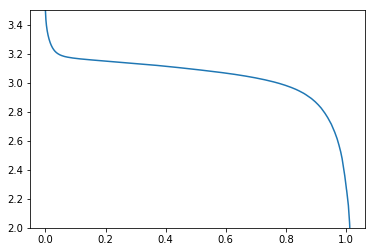

In [157]:
cycle = batch1["b1c0"]["cycles"]["1054"]
v_space = np.linspace(3.5, 2.0, 1000)

plt.plot(cycle["Qdlin"], v_space, label="Qdlin")
plt.ylim(2,3.5)
plt.show()

### 1.4.5 T (temperature in Celsius)

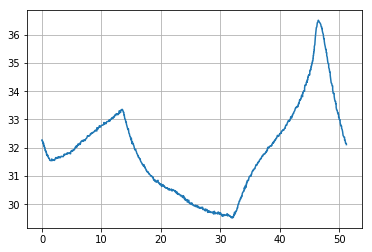

In [168]:
cycle = batch1["b1c0"]["cycles"]["1054"]

plt.plot(cycle["t"], cycle["T"])
plt.grid()
plt.show()

### 1.4.6 Tdlin

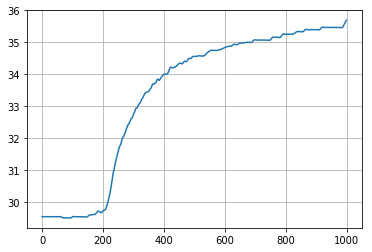

In [173]:
cycle = batch1["b1c0"]["cycles"]["1054"]

plt.plot(cycle["Tdlin"])
plt.grid()
plt.show()

### 1.4.7 V (Volt)

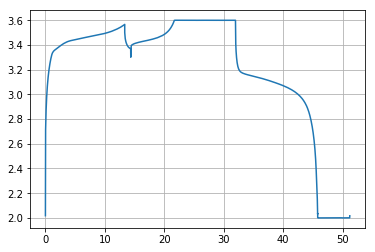

In [174]:
cycle = batch1["b1c0"]["cycles"]["1054"]

plt.plot(cycle["t"], cycle["V"])
plt.grid()
plt.show()

### 1.4.8 dQdV

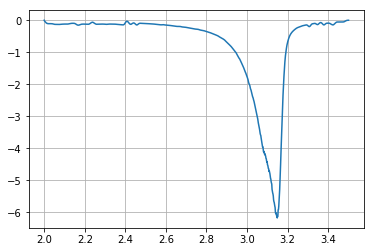

In [192]:
cycle = batch1["b1c0"]["cycles"]["1054"]
v_space = np.linspace(3.5, 2.0, 1000)  # Same voltage range as in the paper.

plt.plot(v_space, cycle["dQdV"])
plt.grid()
plt.show()

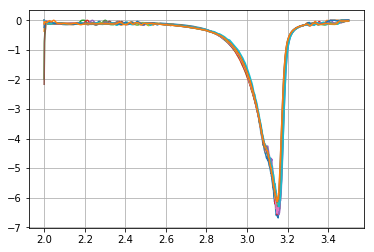

In [212]:
keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(v_space, batch1["b1c0"]["cycles"][key]["dQdV"])

plt.grid()
plt.show()

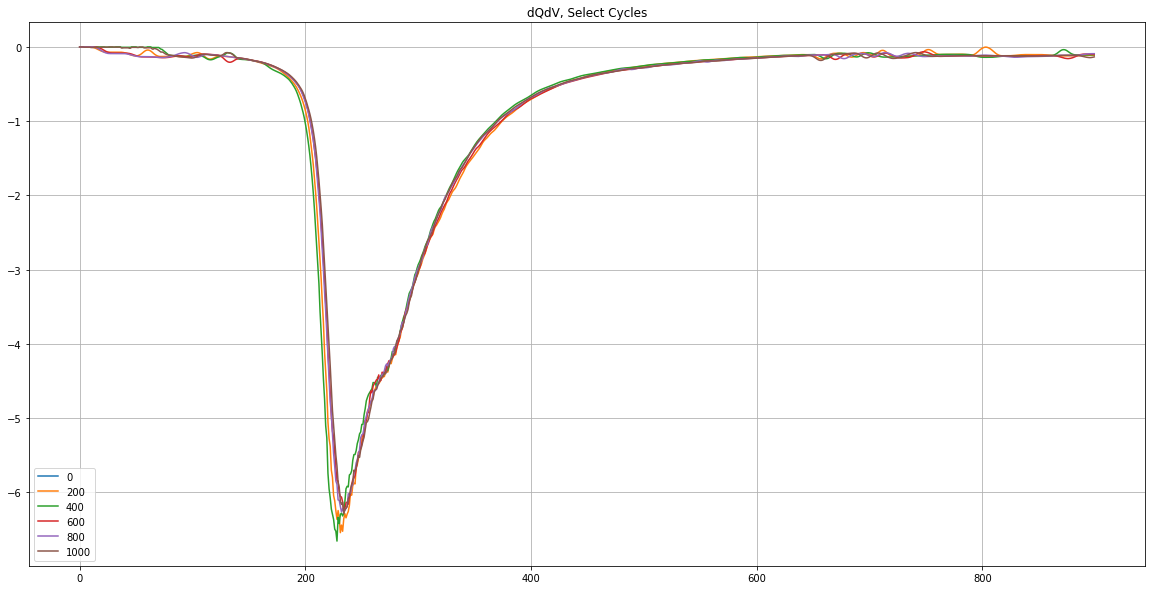

In [213]:
plt.figure(figsize=(20,10))

for i, cycle in batch1["b1c0"]["cycles"].items():
    if int(i) % 200 == 0:
        plt.plot(cycle["dQdV"][:900], label=i)
        
plt.title('dQdV, Select Cycles')
plt.legend()
plt.grid()
plt.show()

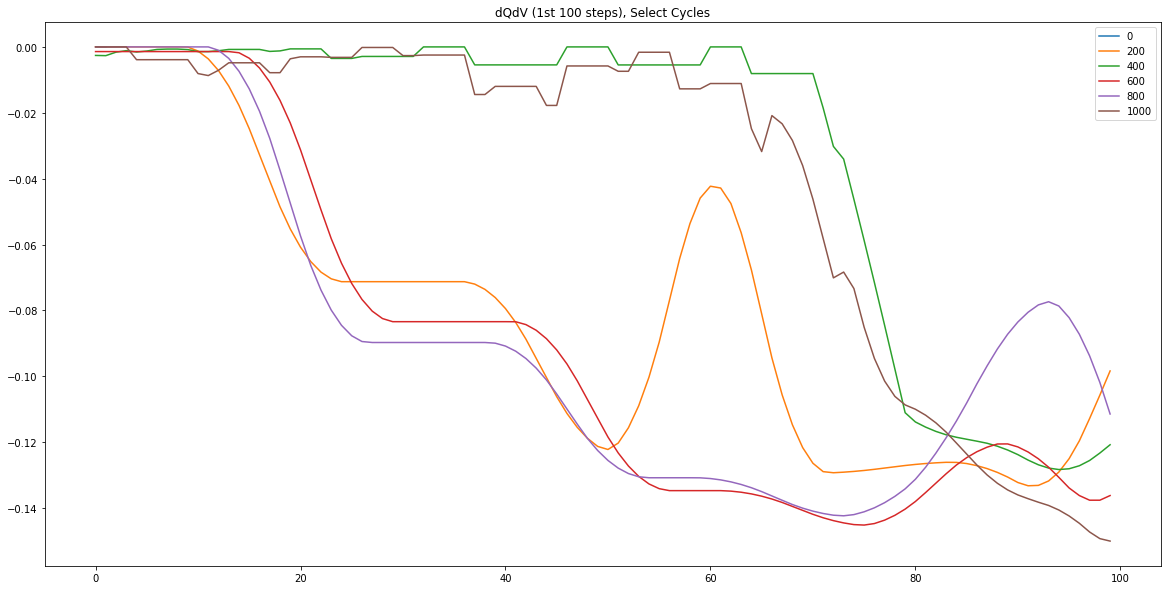

In [214]:
plt.figure(figsize=(20,10))
for i, cycle in dqdv_sample["cycles"].items():
    if int(i) % 200 == 0:
        plt.plot(cycle["dQdV"][:100], label=i)
plt.title('dQdV (1st 100 steps), Select Cycles')
plt.legend()
plt.show()

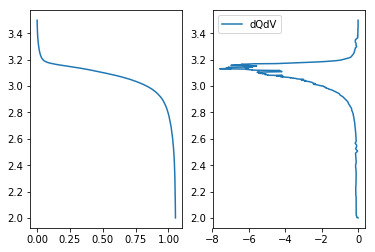

In [221]:
v_space = np.linspace(3.5, 2.0, 1000)  # Same voltage range as in the paper.

fig, ax = plt.subplots(ncols=2)

ax[0].plot(batch1['b1c43']['cycles']['10']['Qdlin'], v_space, label='Qdlin')  # Qd over V (fitted spline)
ax[1].plot(batch1['b1c43']['cycles']['10']['dQdV'], v_space, label='dQdV')  # Gradient of Qd over V (measured)

plt.legend()
plt.show()

### 1.4.9 t (time)

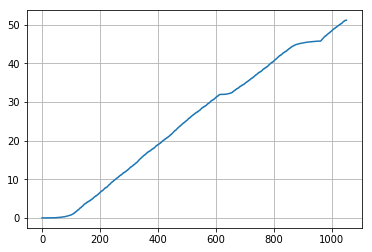

In [222]:
# time elapsed at each step
plt.plot(batch1["b1c0"]["cycles"]["1054"]["t"])
plt.grid()
plt.show()

In [223]:
# time consists of float numbers that represent minutes
list(batch1["b1c0"]["cycles"]["1054"]["t"])[-10:-1]

[50.89044999999994,
 50.97384833333344,
 50.97385000000019,
 51.057265000000186,
 51.14065166666696,
 51.1821166666666,
 51.18211833333335,
 51.183168333333256,
 51.19381999999993]

# Additional graphs

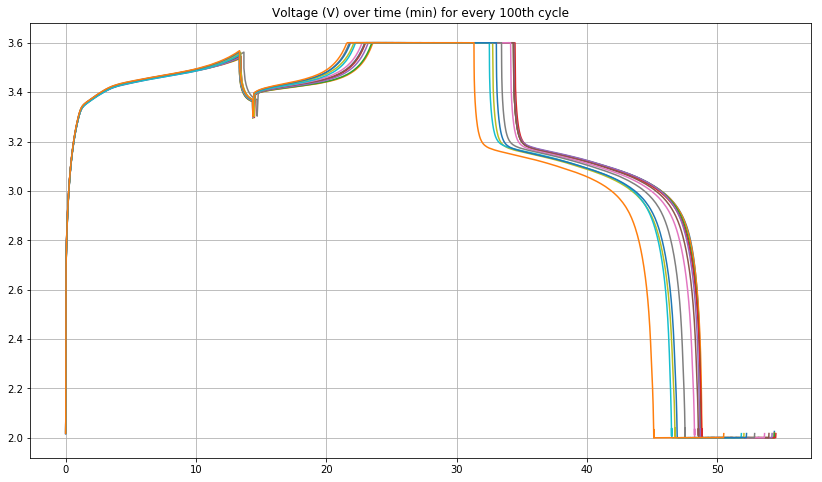

In [224]:
plt.figure(figsize=(14,8))

keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(batch1["b1c0"]["cycles"][key]["t"], batch1["b1c0"]["cycles"][key]["V"])
plt.title("Voltage (V) over time (min) for every 100th cycle")
plt.grid()    
plt.show()

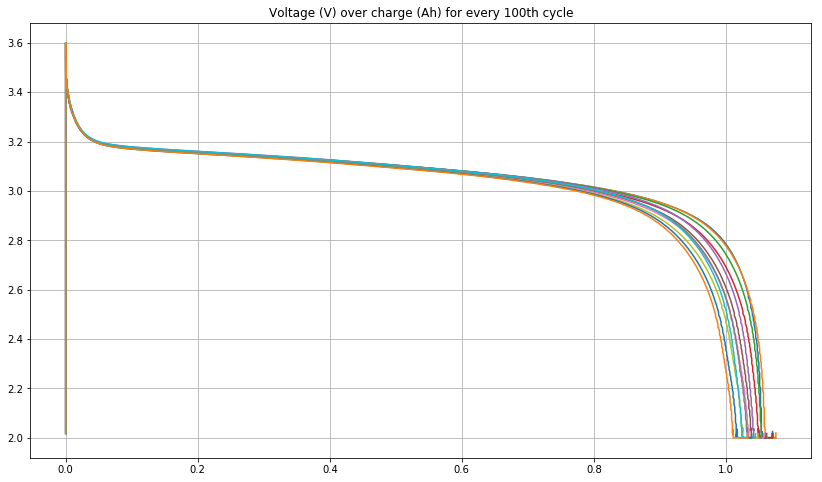

In [225]:
plt.figure(figsize=(14,8))

keys = list(batch1["b1c0"]["cycles"].keys())
for key in keys[1::100]:
    plt.plot(batch1["b1c0"]["cycles"][key]["Qd"], batch1["b1c0"]["cycles"][key]["V"])
plt.title("Voltage (V) over charge (Ah) for every 100th cycle")
plt.grid()    
plt.show()

In [226]:
import pandas as pd
import seaborn as sns

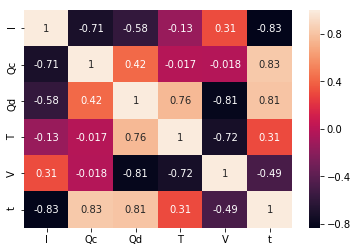

In [227]:
cycle_df = {k: batch1["b1c0"]["cycles"]["1054"][k] for k in ('I', 'Qc', 'Qd', 'T', 'V', 't')}
cycle_df = pd.DataFrame.from_dict(cycle_df)
sns.heatmap(cycle_df.corr(), annot=True)
plt.show()

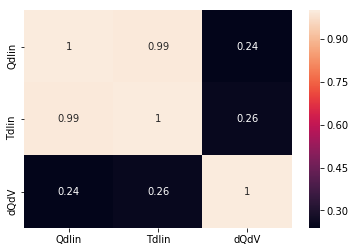

In [230]:
lin_df = {k: batch1["b1c0"]["cycles"]["1054"][k] for k in ('Qdlin', 'Tdlin', 'dQdV')}
lin_df = pd.DataFrame.from_dict(lin_df)
sns.heatmap(lin_df.corr(), annot=True)
plt.show()

Tdlin and Qdlin are on different scales but have almost the same form. Why are they so highly correlated? 

# Continue original notebook

In [ ]:
path2 = Path("Data/batch2.pkl")
batch2 = pickle.load(open(path, 'rb'))

In [ ]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [ ]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [ ]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [ ]:
numBat2 = len(batch2.keys())
numBat2

In [ ]:
path3 = Path("Data/batch3.pkl")
batch3 = pickle.load(open(path, 'rb'))

# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [ ]:
numBat3 = len(batch3.keys())
numBat3

In [ ]:
numBat = numBat1 + numBat2 + numBat3
numBat

In [ ]:
bat_dict = {**batch1, **batch2, **batch3}

In [ ]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [ ]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);